In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("total training data: %d" %len(x_train))
print("total testing data: %d" %len(x_test))
print("dimensions of image:",(x_train[0]).shape)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

total training data: 60000
total testing data: 10000
dimensions of image: (28, 28)


In [3]:
def create_and_save_model():

    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=5)

    model.save("mnist.model")   

In [4]:
# create_and_save_model() 

model = tf.keras.models.load_model("mnist.model")

In [5]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print("\nval loss:", val_loss, "\nval_acc:", val_acc)

10000/10000 [==============================] - 0s 46us/step

val loss: 0.08651540782800876 
val_acc: 0.9754


In [6]:
def predict_digit(image_path):

    image = [cv2.imread(image_path, cv2.IMREAD_GRAYSCALE,),]
    plt.imshow(image[0])
    print("image shape:",image[0].shape)

    image[0] = cv2.resize(image[0], (28, 28)) 
    image[0] = image[0]/255
    image[0] = 1 - image[0]
    plt.imshow(image[0])

    predict = model.predict([image])
    # print(predict)
    print("Predicted Number:", np.argmax(predict))

image shape: (217, 218)
Predicted Number: 0


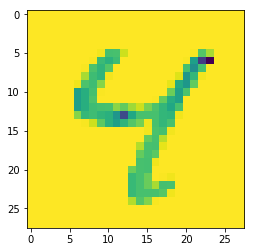

In [7]:
predict_digit("digit/four.jpg")

In [8]:
train = tf.keras.train_datagen.flow_from_directory(
    "digit/",
    target_size=(28, 28))

#print(image)
#y = [2]

#model.fit(image[0], )

AttributeError: module 'tensorflow.python.keras' has no attribute 'train_datagen'